## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.315984  0.371616  0.383919 -0.075292  0.014175  0.485830
1  0.753716 -0.403913 -0.050870 -0.319177 -0.756479 -0.195061
2  0.819237 -1.714933  1.521518 -1.204904 -1.627797 -1.413199
3 -1.598090 -0.913506 -0.980674  0.596084  1.391427 -0.209635
4 -0.217649 -0.564183 -0.911155 -0.945349  0.784094 -0.404289


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9899950	total: 57.5ms	remaining: 57.5s
1:	learn: 0.9818681	total: 58.1ms	remaining: 29s
2:	learn: 0.9736264	total: 58.6ms	remaining: 19.5s
3:	learn: 0.9652239	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9559986	total: 59.6ms	remaining: 11.9s
5:	learn: 0.9459574	total: 60.1ms	remaining: 9.96s
6:	learn: 0.9342371	total: 60.6ms	remaining: 8.59s
7:	learn: 0.9242602	total: 61.1ms	remaining: 7.58s
8:	learn: 0.9170978	total: 61.6ms	remaining: 6.78s
9:	learn: 0.9077348	total: 62.1ms	remaining: 6.15s
10:	learn: 0.8994647	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8914176	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8829700	total: 63.6ms	remaining: 4.83s
13:	learn: 0.8753047	total: 64.1ms	remaining: 4.51s
14:	learn: 0.8686740	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8612277	total: 65ms	remaining: 4s
16:	learn: 0.8545521	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8473405	total: 65.9ms	remaining: 3.6s
18:	learn: 0.8389130	total: 66.4ms	remaining: 3.43s
1

103:	learn: 0.4222036	total: 108ms	remaining: 935ms
104:	learn: 0.4195169	total: 109ms	remaining: 929ms
105:	learn: 0.4159806	total: 110ms	remaining: 924ms
106:	learn: 0.4123278	total: 110ms	remaining: 918ms
107:	learn: 0.4093656	total: 110ms	remaining: 912ms
108:	learn: 0.4066790	total: 111ms	remaining: 906ms
109:	learn: 0.4037426	total: 111ms	remaining: 901ms
110:	learn: 0.4009104	total: 112ms	remaining: 896ms
111:	learn: 0.3983685	total: 112ms	remaining: 891ms
112:	learn: 0.3953234	total: 113ms	remaining: 887ms
113:	learn: 0.3923856	total: 114ms	remaining: 884ms
114:	learn: 0.3897136	total: 114ms	remaining: 878ms
115:	learn: 0.3860289	total: 114ms	remaining: 872ms
116:	learn: 0.3832719	total: 115ms	remaining: 867ms
117:	learn: 0.3807005	total: 115ms	remaining: 862ms
118:	learn: 0.3787372	total: 116ms	remaining: 858ms
119:	learn: 0.3767929	total: 116ms	remaining: 853ms
120:	learn: 0.3741209	total: 117ms	remaining: 847ms
121:	learn: 0.3716661	total: 117ms	remaining: 842ms
122:	learn: 

274:	learn: 0.1330633	total: 187ms	remaining: 493ms
275:	learn: 0.1322969	total: 188ms	remaining: 493ms
276:	learn: 0.1314494	total: 188ms	remaining: 492ms
277:	learn: 0.1306073	total: 189ms	remaining: 490ms
278:	learn: 0.1296885	total: 189ms	remaining: 489ms
279:	learn: 0.1286934	total: 190ms	remaining: 487ms
280:	learn: 0.1277818	total: 190ms	remaining: 486ms
281:	learn: 0.1269810	total: 190ms	remaining: 485ms
282:	learn: 0.1260800	total: 191ms	remaining: 483ms
283:	learn: 0.1253851	total: 191ms	remaining: 482ms
284:	learn: 0.1244657	total: 192ms	remaining: 481ms
285:	learn: 0.1237625	total: 192ms	remaining: 480ms
286:	learn: 0.1229894	total: 193ms	remaining: 479ms
287:	learn: 0.1221895	total: 193ms	remaining: 477ms
288:	learn: 0.1212800	total: 194ms	remaining: 476ms
289:	learn: 0.1203609	total: 194ms	remaining: 475ms
290:	learn: 0.1197230	total: 194ms	remaining: 474ms
291:	learn: 0.1189854	total: 195ms	remaining: 472ms
292:	learn: 0.1182129	total: 195ms	remaining: 472ms
293:	learn: 

496:	learn: 0.0393502	total: 292ms	remaining: 295ms
497:	learn: 0.0391328	total: 292ms	remaining: 294ms
498:	learn: 0.0389807	total: 293ms	remaining: 294ms
499:	learn: 0.0387691	total: 293ms	remaining: 293ms
500:	learn: 0.0385217	total: 294ms	remaining: 292ms
501:	learn: 0.0383160	total: 294ms	remaining: 292ms
502:	learn: 0.0381351	total: 294ms	remaining: 291ms
503:	learn: 0.0378970	total: 295ms	remaining: 290ms
504:	learn: 0.0377307	total: 295ms	remaining: 289ms
505:	learn: 0.0375577	total: 296ms	remaining: 289ms
506:	learn: 0.0373952	total: 296ms	remaining: 288ms
507:	learn: 0.0371667	total: 297ms	remaining: 287ms
508:	learn: 0.0369851	total: 297ms	remaining: 287ms
509:	learn: 0.0368276	total: 298ms	remaining: 286ms
510:	learn: 0.0366644	total: 298ms	remaining: 285ms
511:	learn: 0.0365101	total: 299ms	remaining: 285ms
512:	learn: 0.0363566	total: 299ms	remaining: 284ms
513:	learn: 0.0362061	total: 299ms	remaining: 283ms
514:	learn: 0.0359899	total: 300ms	remaining: 282ms
515:	learn: 

658:	learn: 0.0212445	total: 369ms	remaining: 191ms
659:	learn: 0.0211237	total: 369ms	remaining: 190ms
660:	learn: 0.0210354	total: 370ms	remaining: 190ms
661:	learn: 0.0209327	total: 370ms	remaining: 189ms
662:	learn: 0.0208963	total: 371ms	remaining: 188ms
663:	learn: 0.0208190	total: 371ms	remaining: 188ms
664:	learn: 0.0207832	total: 372ms	remaining: 187ms
665:	learn: 0.0206796	total: 372ms	remaining: 187ms
666:	learn: 0.0206448	total: 372ms	remaining: 186ms
667:	learn: 0.0205285	total: 373ms	remaining: 185ms
668:	learn: 0.0204944	total: 373ms	remaining: 185ms
669:	learn: 0.0204196	total: 374ms	remaining: 184ms
670:	learn: 0.0203146	total: 374ms	remaining: 183ms
671:	learn: 0.0202600	total: 375ms	remaining: 183ms
672:	learn: 0.0202270	total: 375ms	remaining: 182ms
673:	learn: 0.0201926	total: 375ms	remaining: 182ms
674:	learn: 0.0200897	total: 376ms	remaining: 181ms
675:	learn: 0.0200556	total: 376ms	remaining: 180ms
676:	learn: 0.0200351	total: 377ms	remaining: 180ms
677:	learn: 

874:	learn: 0.0109890	total: 474ms	remaining: 67.7ms
875:	learn: 0.0109508	total: 475ms	remaining: 67.2ms
876:	learn: 0.0109088	total: 475ms	remaining: 66.7ms
877:	learn: 0.0108955	total: 476ms	remaining: 66.1ms
878:	learn: 0.0108344	total: 477ms	remaining: 65.6ms
879:	learn: 0.0108121	total: 477ms	remaining: 65ms
880:	learn: 0.0107615	total: 477ms	remaining: 64.5ms
881:	learn: 0.0107244	total: 478ms	remaining: 63.9ms
882:	learn: 0.0107114	total: 479ms	remaining: 63.4ms
883:	learn: 0.0106541	total: 479ms	remaining: 62.9ms
884:	learn: 0.0106146	total: 480ms	remaining: 62.4ms
885:	learn: 0.0105574	total: 481ms	remaining: 61.8ms
886:	learn: 0.0105000	total: 481ms	remaining: 61.3ms
887:	learn: 0.0104930	total: 481ms	remaining: 60.7ms
888:	learn: 0.0104748	total: 482ms	remaining: 60.2ms
889:	learn: 0.0104355	total: 482ms	remaining: 59.6ms
890:	learn: 0.0104286	total: 483ms	remaining: 59.1ms
891:	learn: 0.0104107	total: 483ms	remaining: 58.5ms
892:	learn: 0.0103629	total: 484ms	remaining: 58

999:	learn: 0.0080726	total: 536ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

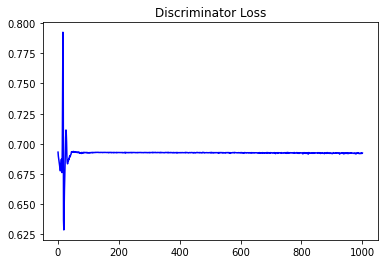

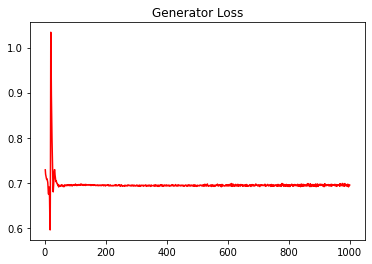

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1513871040008291


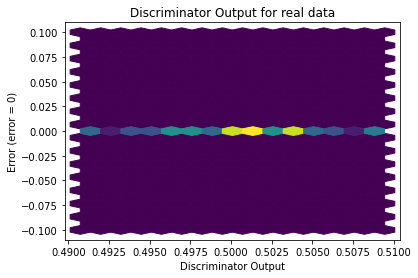

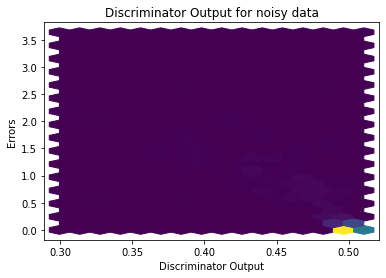

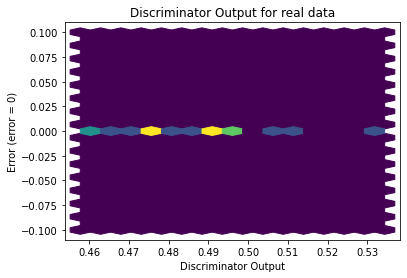

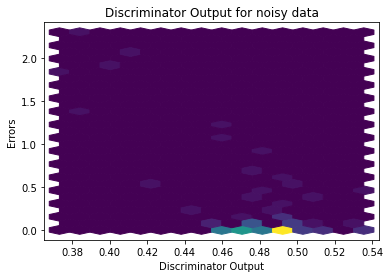

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


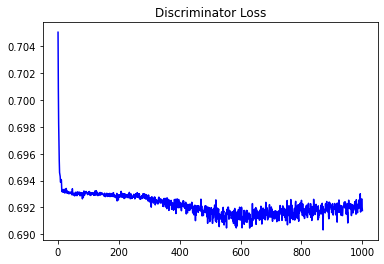

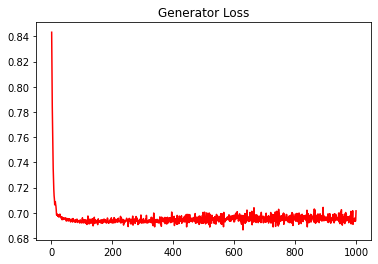

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.19610885602354025


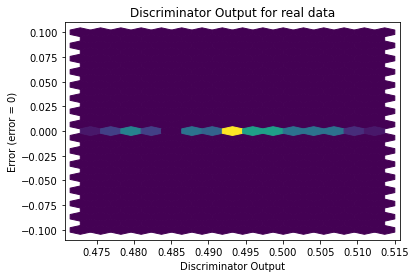

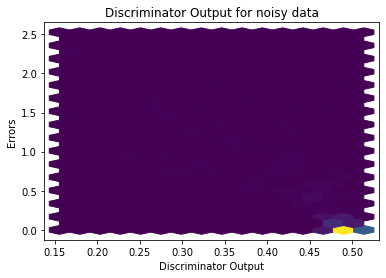

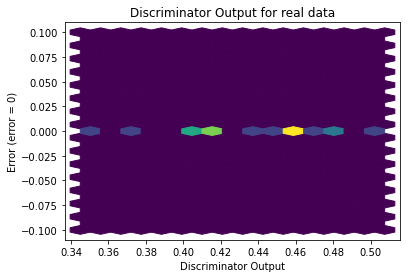

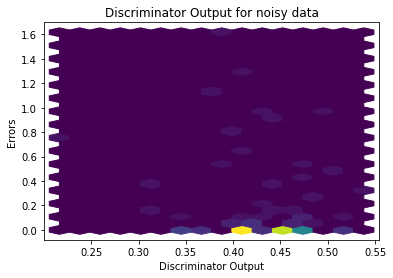

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1930]], requires_grad=True)
